In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re  
import nltk
import string
from bs4 import BeautifulSoup
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from textblob import TextBlob

In [7]:
df = pd.read_csv('asos_transform.csv')

In [8]:
df['Contents'][4]

"Rebecca was patient and helpful with my queries, though there seems to be some logistic issues with ASOS delivery. I've only received 1 out of the 4 parcels that were deemed to be delivered on the same day."

In [9]:
def remove_punctuation(text):
    no_punct="".join([c for c in text if c not in string.punctuation])
    return no_punct

In [10]:
df['Contents'] = df['Contents'].apply(lambda x: remove_punctuation(x))
df['Contents'].head()

0    I love ASOS and allCustomer service they are j...
1    My order was left outside and the school kids ...
2                           Helpful and friendly staff
3    Replied quickly and made sure their customers ...
4    Rebecca was patient and helpful with my querie...
Name: Contents, dtype: object

In [11]:
tokenizer = RegexpTokenizer(r'\w+')

In [12]:
df['Contents']=df['Contents'].apply(lambda x: tokenizer.tokenize(x.lower()))
df['Contents'].head(20)

0     [i, love, asos, and, allcustomer, service, the...
1     [my, order, was, left, outside, and, the, scho...
2                       [helpful, and, friendly, staff]
3     [replied, quickly, and, made, sure, their, cus...
4     [rebecca, was, patient, and, helpful, with, my...
5     [fast, kind, clear, answer, perfect, that, i, ...
6     [it, took, over, 20, minutes, to, be, connecte...
7     [terrible, firm, i, had, such, a, bad, time, t...
8                   [very, helpful, clear, and, prompt]
9     [ordered, a, vivienne, westwood, which, was, d...
10    [terrible, paid, for, next, day, delivery, and...
11                               [excellent, and, easy]
12    [renee, at, asos, was, very, friendly, and, pr...
13    [items, ordered, on, 112, on, standard, 35, da...
14    [terrible, experience, courier, left, my, parc...
15    [no, customer, support, at, allleave, your, me...
16    [i, had, issue, with, the, delivery, of, my, o...
17    [my, issue, remains, unresolved, and, i, h

In [13]:
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words

In [14]:
df['Contents']= df['Contents'].apply(lambda x : remove_stopwords(x))
df['Contents'].head(10)

0         [love, asos, allcustomer, service, adorable]
1    [order, left, outside, school, kids, ransacked...
2                           [helpful, friendly, staff]
3     [replied, quickly, made, sure, customers, happy]
4    [rebecca, patient, helpful, queries, though, s...
5    [fast, kind, clear, answer, perfect, love, aso...
6    [took, 20, minutes, connected, online, chat, s...
7    [terrible, firm, bad, time, trying, get, deliv...
8                             [helpful, clear, prompt]
9    [ordered, vivienne, westwood, delivered, time,...
Name: Contents, dtype: object

In [15]:
#Instatiate Stemmer
stemmer = SnowballStemmer('english')

In [16]:
def word_stemmer(text):
    stem_text = " ".join([stemmer.stem(i) for i in text])
    return stem_text

In [17]:
df['Contents']=df['Contents'].apply(lambda x:word_stemmer(x))
df['Contents'].head(10)

0                       love aso allcustom servic ador
1    order left outsid school kid ransack howev her...
2                                    help friend staff
3                   repli quick made sure custom happi
4    rebecca patient help queri though seem logist ...
5       fast kind clear answer perfect love aso servic
6    took 20 minut connect onlin chat servic upon w...
7    terribl firm bad time tri get deliv wont use u...
8                                    help clear prompt
9    order vivienn westwood deliv time arriv seal w...
Name: Contents, dtype: object

In [18]:
df_results = df['Contents'].apply(lambda x: TextBlob(x).sentiment)

In [19]:
print(df_results)

0                                      (0.5, 0.6)
1                      (0.19999999999999998, 0.3)
2                                      (0.0, 0.0)
3       (0.41666666666666663, 0.6944444444444444)
4                                      (0.0, 0.0)
                          ...                    
1995                   (0.3181818181818182, 0.55)
1996                                  (0.8, 0.75)
1997                                   (0.2, 0.6)
1998                                   (0.0, 0.0)
1999                                   (0.0, 0.0)
Name: Contents, Length: 2000, dtype: object


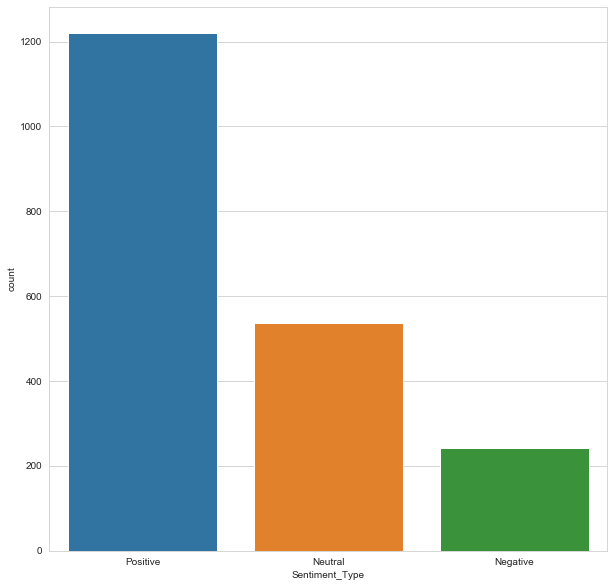

In [20]:
bloblist_tags = list()

df_str =df['Contents']
for row in df_str:
    blob = TextBlob(row)
    bloblist_tags.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_str = pd.DataFrame(bloblist_tags, columns = ['sentence','sentiment','polarity'])

def f_tags(df_str):
    if df_str['sentiment'] > 0:
        val = "Positive"
    elif df_str['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_str['Sentiment_Type'] = df_str.apply(f_tags, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_str)

In [25]:
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS

def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

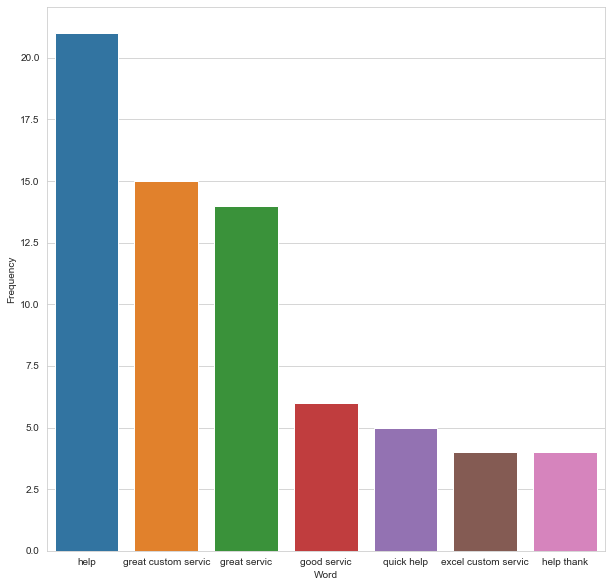

In [29]:
from collections import Counter


top_N = 100
       

# Calculate frequency distribution
word_dist = nltk.FreqDist(df['Contents'])
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

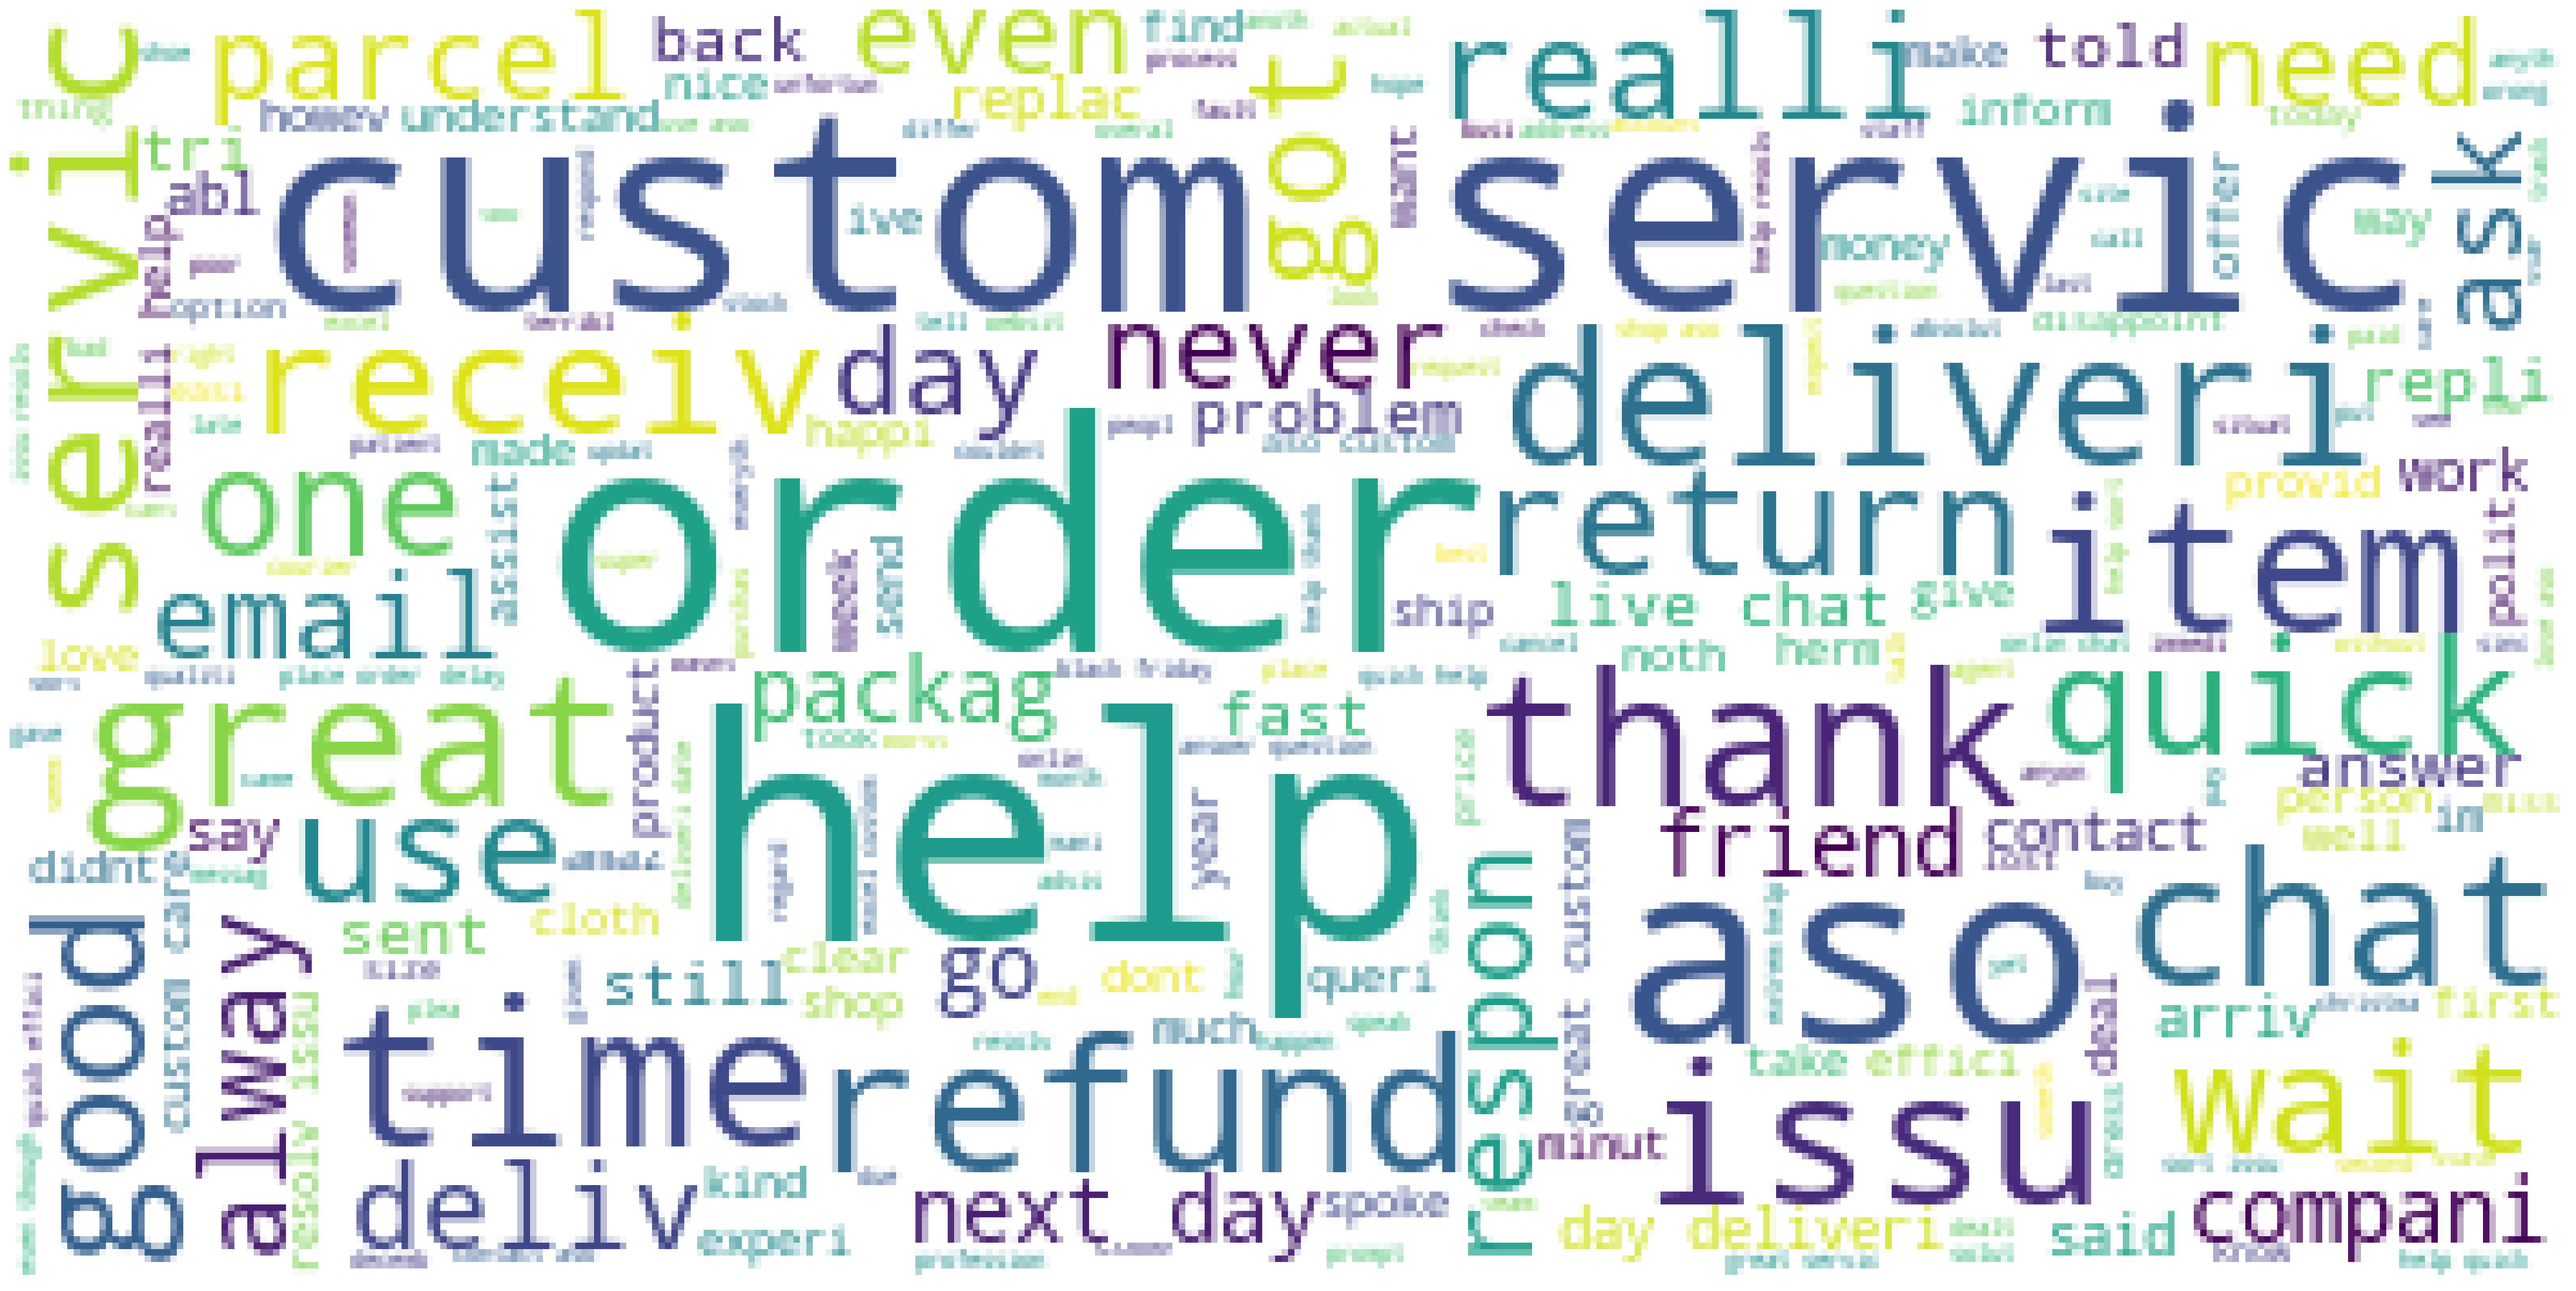

In [28]:
wc(df['Contents'],'white','Common Words' )